In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data_1 = pd.read_csv('./data/prepared/prepared_basic.csv')
data_2 = pd.read_csv('./data/prepared/prepared_rfm_advanced.csv')

In [19]:
data_2.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>RecencyValue_score</th>
      <th>FrequencyValue_2010-12-01 08:26:00_2011-03-01 08:26:00_score</th>
      <th>FrequencyValue_2011-03-01 08:26:00_2011-06-01 08:26:00_score</th>
      <th>FrequencyValue_2011-06-01 08:26:00_2011-09-01 08:26:00_score</th>
      <th>FrequencyValue_2011-09-01 08:26:00_2011-12-09 12:50:00_score</th>
      <th>MonetaryValue_2010-12-01 08:26:00_2011-03-01 08:26:00_score</th>
      <th>MonetaryValue_2011-03-01 08:26:00_2011-06-01 08:26:00_score</th>
      <th>MonetaryValue_2011-06-01 08:26:00_2011-09-01 08:26:00_score</th>
      <th>MonetaryValue_2011-09-01 08:26:00_2011-12-09 12:50:00_score</th>
      <th>mean</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0.33</td>
    </tr>
  </tbody>
</table>
</div>

In [20]:
print(data_1.head(1))

   CustomerID  85123A  71053  84406B  84029G  84029E  22752  21730  22633  \
0     12346.0  -100.0 -100.0  -100.0  -100.0  -100.0 -100.0 -100.0 -100.0   

   22632     ...       RSA  Saudi Arabia  Singapore  Spain  Sweden  \
0 -100.0     ...       0.0           0.0        0.0    0.0     0.0   

   Switzerland  USA  United Arab Emirates  United Kingdom  Unspecified  
0          0.0  0.0                   0.0             1.0          0.0  

[1 rows x 3703 columns]


In [21]:
data = data_1.join(data_2.set_index('CustomerID'), on='CustomerID')

In [22]:
data.to_csv('./data/prepared/prepared_rfm+basics.csv', index=False)

In [24]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score


In [25]:
K_values = range(2, 10, 1)
progress = 0
scores = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data)
    # clusters = kmeans.transform(data)
    score = silhouette_score(data, kmeans.labels_)
    scores.append(score)
    
    progress += 1
    print ('\r' + str(int(100 * progress / len(K_values))), end='%')

    
    

12%

25%

37%

50%

62%

75%

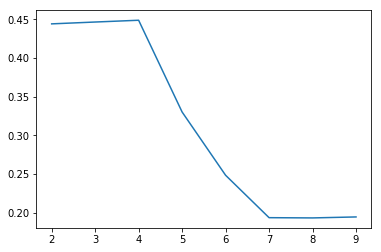

In [29]:
plt.plot(K_values, scores)


In [31]:
scores, list(K_values)

([0.44409488239542616,
  0.4464734950756414,
  0.44877517916759296,
  0.3301784019615126,
  0.24844875030028726,
  0.193627225060022,
  0.19331340097804459,
  0.19457216558720644],
 [2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
best_value = K_values[[i for i, j in enumerate(scores) if j == max(scores)][0]] # !
kmeans = KMeans(n_clusters=best_value)
kmeans.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
clusters_df = pd.DataFrame()

In [34]:
clusters_df['SegmentNo'] = kmeans.labels_

In [35]:
clusters_df['CustomerID'] = data['CustomerID']

In [36]:
clusters_df.to_csv('./results/segments_rfm+basic.csv', index=False)